# Introduction to Convolutional Neural Networks and Computer Vision With Tensorflow

Computer vision is the practice of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

# Get the data

kaggle pr 101 classes of food ka hai pr
humne modify krkr usko sirf 2 classes ke liye kiya hai (pizza r steak)

**Note**-> We start the smaller dataset so we can experiment quickly and figure what works(or better yet what doesn't work)

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-10-13 15:14:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   125MB/s    in 0.8s    

2024-10-13 15:14:18 (125 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data(become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
! ls pizza_steak

test  train


In [ ]:
! ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os
# walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and  {len(filenames)} images in '{dirpath}'.")

There are 2 directories and  0 images in 'pizza_steak'.
There are 2 directories and  0 images in 'pizza_steak/train'.
There are 0 directories and  750 images in 'pizza_steak/train/steak'.
There are 0 directories and  750 images in 'pizza_steak/train/pizza'.
There are 2 directories and  0 images in 'pizza_steak/test'.
There are 0 directories and  250 images in 'pizza_steak/test/steak'.
There are 0 directories and  250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

In [ ]:
num_pizza_images_train=len(os.listdir('pizza_steak/train/pizza'))

In [ ]:
num_pizza_images_train

750

TO visualize our images,first let's get the classes names programatically

In [ ]:
# get the classnames programatically
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirector
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target directory (we'll view images from here)
  target_folder=target_dir+ '/'+target_class
  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  # Read the image and plot it using matplotlib
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape :{img.shape}")
  return img

Image shape :(289, 512, 3)


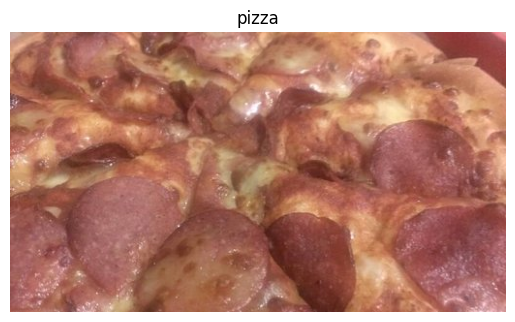

In [ ]:
img=view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(289, 512, 3), dtype=uint8, numpy=
array([[[194, 167, 158],
        [194, 167, 158],
        [195, 167, 156],
        ...,
        [227, 163, 161],
        [223, 164, 160],
        [219, 164, 159]],

       [[194, 165, 157],
        [195, 166, 158],
        [198, 170, 159],
        ...,
        [225, 157, 156],
        [224, 160, 158],
        [223, 164, 160]],

       [[195, 165, 157],
        [197, 167, 159],
        [199, 169, 159],
        ...,
        [225, 149, 151],
        [226, 154, 155],
        [229, 159, 159]],

       ...,

       [[163,  89,  80],
        [159,  85,  76],
        [156,  83,  74],
        ...,
        [213, 153, 155],
        [211, 151, 153],
        [208, 148, 150]],

       [[164,  90,  79],
        [159,  85,  74],
        [156,  83,  74],
        ...,
        [209, 149, 151],
        [208, 148, 148],
        [208, 148, 148]],

       [[168,  94,  81],
        [168,  94,  81],
        [166,  94,  82],
        ...,
        [216, 158, 15

In [ ]:
#View the image shape
img.shape # Return height , width, color channel

(289, 512, 3)

In [ ]:
#Get all the pixel value b/w 0 and 1
img/255.0

array([[[0.76078431, 0.65490196, 0.61960784],
        [0.76078431, 0.65490196, 0.61960784],
        [0.76470588, 0.65490196, 0.61176471],
        ...,
        [0.89019608, 0.63921569, 0.63137255],
        [0.8745098 , 0.64313725, 0.62745098],
        [0.85882353, 0.64313725, 0.62352941]],

       [[0.76078431, 0.64705882, 0.61568627],
        [0.76470588, 0.65098039, 0.61960784],
        [0.77647059, 0.66666667, 0.62352941],
        ...,
        [0.88235294, 0.61568627, 0.61176471],
        [0.87843137, 0.62745098, 0.61960784],
        [0.8745098 , 0.64313725, 0.62745098]],

       [[0.76470588, 0.64705882, 0.61568627],
        [0.77254902, 0.65490196, 0.62352941],
        [0.78039216, 0.6627451 , 0.62352941],
        ...,
        [0.88235294, 0.58431373, 0.59215686],
        [0.88627451, 0.60392157, 0.60784314],
        [0.89803922, 0.62352941, 0.62352941]],

       ...,

       [[0.63921569, 0.34901961, 0.31372549],
        [0.62352941, 0.33333333, 0.29803922],
        [0.61176471, 0

**Note** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also reffered to as normalize ) their pixel values by dividing the image arrays by 225 (since 225 the maximum pixel value)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* load our images
* Preprocess our images
* Build a Cnn to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)

# Preprocess data(get all of the pixel values b/w 0 & 1 ,also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
# Setup path to our data directory
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'
# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)



# BUild a Cnn model (same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Fit the model
# The issue was the validation steps were higher than the number of samples in the test set
# By setting it to  len(valid_data) it is ensured there are proper no of steps for validation
print("Number of validation steps:", len(valid_data))
validation_steps = min(len(valid_data), 10)
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=validation_steps) # Ensure the validation_steps is set correctly

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Number of validation steps: 16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.5490 - loss: 0.6762 - val_accuracy: 0.6750 - val_loss: 0.5697
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6222 - val_loss: 0.6378
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.7585 - loss: 0.5086 - val_accuracy: 0.8031 - val_loss: 0.4317
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7556 - val_loss: 0.4536
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.7978 - loss: 0.4556 - val_accuracy: 0.8594 - val_loss: 0.3458


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
len(train_data)

47

<Axes: >

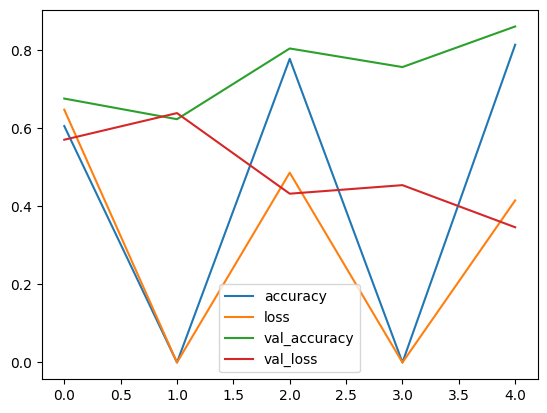

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Using the same model

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [ ]:
#set random seed
tf.random.set_seed(42)
# Create a model to replicate the Tensorflow Playground model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )
validation_steps = min(len(valid_data), 10)
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=validation_steps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.5048 - loss: 0.7094 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5222 - val_loss: 0.6930
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.5043 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5278 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5125 - val_loss: 0.6931


Despite having 20X more paramters than our CNN(model_1) model_2 performs terribly.... let's try to improve it..

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
validation_steps=min(10,len(valid_data))

history_3=model_3.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=validation_steps)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 394ms/step - accuracy: 0.5990 - loss: 8.1553 - val_accuracy: 0.7406 - val_loss: 0.7389
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7222 - val_loss: 0.7712
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - accuracy: 0.7035 - loss: 0.9252 - val_accuracy: 0.6531 - val_loss: 0.8180
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6611 - val_loss: 0.8607
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 392ms/step - accuracy: 0.7468 - loss: 0.5915 - val_accuracy: 0.6562 - val_loss: 0.8359


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Let's break it down

1. Become one with the data(visualize,visualize)

2. Preprocess the data (prepared it for our model,the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(exp,experiment)

1. Become one with the data

Image shape :(384, 512, 3)
Image shape :(512, 382, 3)


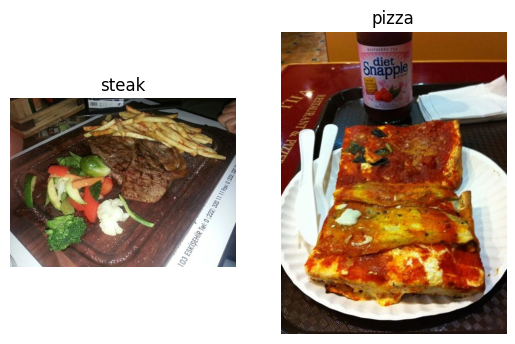

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image(target_dir='pizza_steak/train',
                  target_class='steak')
plt.subplot(1,2,2)
pizza_img=view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

### Preprocess the data

In [ ]:
# Defien the directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

**Our Next step is to turn our data into batches**
 A batch is a small subset of data, Rather than look at all ~10000 images at one time , a model might only look at 32 at a time.

 it does this for a couple of reasons:
 1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
 2. Trying to learn the patterns in 10,000 images in one hit could result in the model nto being able to learn very well.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [ ]:
train_datagen

In [ ]:
# Load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)# get the next batch of images/labels in train_data
len(images),len(labels)

(32, 32)

In [ ]:
images[0]

array([[[0.11764707, 0.08235294, 0.08627451],
        [0.1254902 , 0.09019608, 0.09411766],
        [0.09803922, 0.07450981, 0.07450981],
        ...,
        [0.18431373, 0.18039216, 0.24313727],
        [0.18431373, 0.18039216, 0.24313727],
        [0.1764706 , 0.17254902, 0.23529413]],

       [[0.10588236, 0.07058824, 0.07450981],
        [0.10196079, 0.06666667, 0.07058824],
        [0.08235294, 0.05882353, 0.05882353],
        ...,
        [0.1764706 , 0.16862746, 0.21960786],
        [0.18039216, 0.17254902, 0.21568629],
        [0.18823531, 0.1764706 , 0.21960786]],

       [[0.10196079, 0.07843138, 0.07843138],
        [0.08627451, 0.0627451 , 0.0627451 ],
        [0.07450981, 0.0509804 , 0.0509804 ],
        ...,
        [0.15686275, 0.14901961, 0.16862746],
        [0.16470589, 0.14509805, 0.16078432],
        [0.17254902, 0.15294118, 0.16862746]],

       ...,

       [[0.9450981 , 0.8980393 , 0.8352942 ],
        [0.9450981 , 0.8980393 , 0.8352942 ],
        [0.94117653, 0

In [ ]:
labels[0]

1.0

In [ ]:
len(train_data) # Means 47 batches we have because 1500/32

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2],images[0].shape

(array([[[[0.11764707, 0.08235294, 0.08627451],
          [0.1254902 , 0.09019608, 0.09411766],
          [0.09803922, 0.07450981, 0.07450981],
          ...,
          [0.18431373, 0.18039216, 0.24313727],
          [0.18431373, 0.18039216, 0.24313727],
          [0.1764706 , 0.17254902, 0.23529413]],
 
         [[0.10588236, 0.07058824, 0.07450981],
          [0.10196079, 0.06666667, 0.07058824],
          [0.08235294, 0.05882353, 0.05882353],
          ...,
          [0.1764706 , 0.16862746, 0.21960786],
          [0.18039216, 0.17254902, 0.21568629],
          [0.18823531, 0.1764706 , 0.21960786]],
 
         [[0.10196079, 0.07843138, 0.07843138],
          [0.08627451, 0.0627451 , 0.0627451 ],
          [0.07450981, 0.0509804 , 0.0509804 ],
          ...,
          [0.15686275, 0.14901961, 0.16862746],
          [0.16470589, 0.14509805, 0.16078432],
          [0.17254902, 0.15294118, 0.16862746]],
 
         ...,
 
         [[0.9450981 , 0.8980393 , 0.8352942 ],
          [0.94509

# Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting , you try to beat the baseline

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
# Create the model # this will be our baseline
model_4 =Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid", # if same then the output shape is same as the input shape,if valid then output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data),len(test_data)

(47, 16)

Here the training data is the combination of labels and sample data

In [ ]:
#Fit the model
valid_steps=min(10,len(test_data))
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=valid_steps)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.5395 - loss: 1.3914 - val_accuracy: 0.7688 - val_loss: 0.4767
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7278 - val_loss: 0.5309
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8003 - loss: 0.4576 - val_accuracy: 0.8250 - val_loss: 0.4005
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8556 - val_loss: 0.3778
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.8535 - loss: 0.3578 - val_accuracy: 0.8281 - val_loss: 0.4099


In [ ]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 718ms/step - accuracy: 0.8775 - loss: 0.3257


[0.333755224943161, 0.8600000143051147]

In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 937ms/step - accuracy: 0.8446 - loss: 0.3927


[0.395913690328598, 0.8379999995231628]

<Axes: >

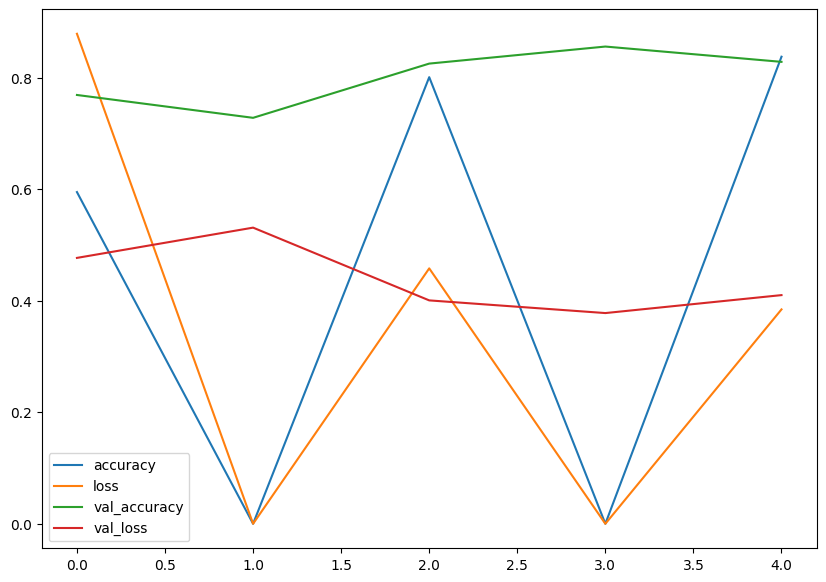

In [ ]:
# Let's evaluate our model using the plot curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  # plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="validation_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="Val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

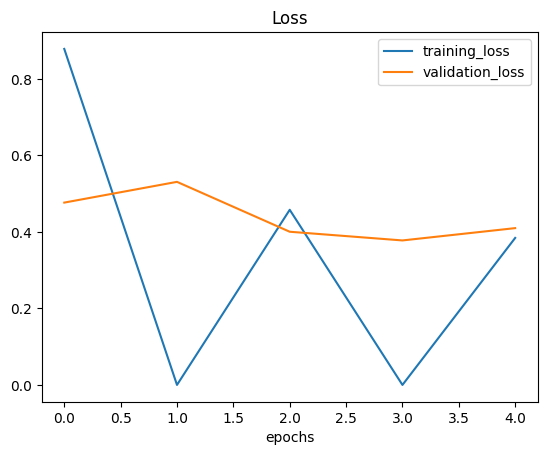

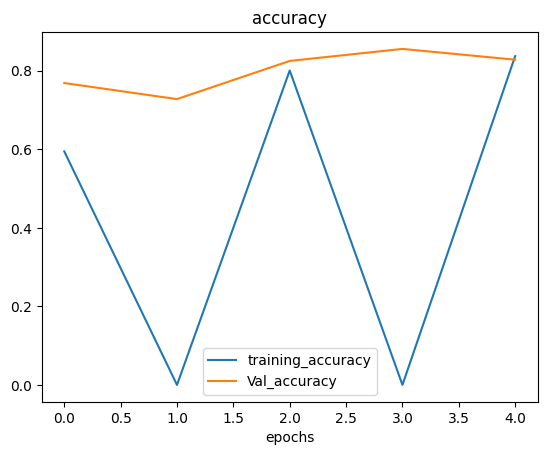

In [ ]:
plot_loss_curves(history_4)

**Note**: When a model's validation starts to increase as well much , it's likely that the model is **overfitting** , it means it's learning the training dataset too well and thus the model's ability to **generalize** to unseen data is diminished

##6. Adjust the model parameters

Fitting a machine model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model

2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv **layers**
* Increase the number of conv **filters**
* Add another dense layer to the output of our flattened layer

Ways to Reduce overfitting:
* Add Data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data

**Note**: Reducing overfitting is also known as **regularization**


In [ ]:
# Create the model (the new baseline)
model_5=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
val_steps=min(len(valid_data),10)
history_5=model_5.fit(train_data,
            epochs=5,
             steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=val_steps)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5198 - loss: 0.6872 - val_accuracy: 0.6500 - val_loss: 0.6095
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6278 - val_loss: 0.6519
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6784 - loss: 0.6165 - val_accuracy: 0.7781 - val_loss: 0.4393
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7944 - val_loss: 0.4434
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7887 - loss: 0.4591 - val_accuracy: 0.7188 - val_loss: 0.5112


In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 546ms/step - accuracy: 0.7268 - loss: 0.5189


[0.5031181573867798, 0.7360000014305115]

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

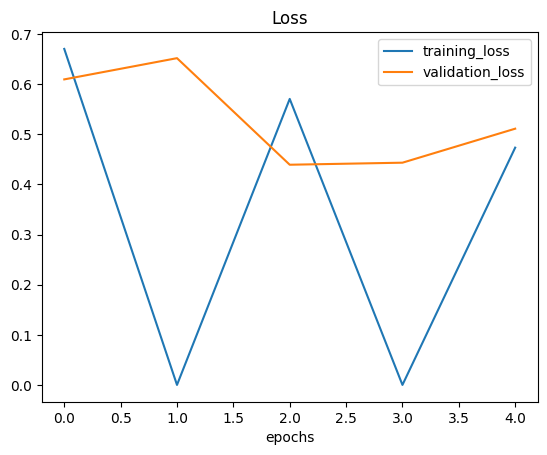

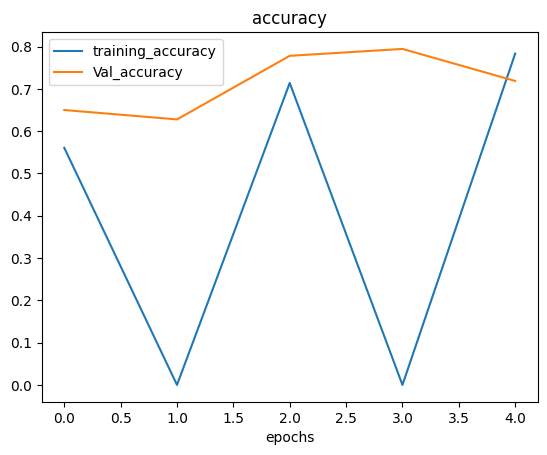

In [ ]:
plot_loss_curves(history_5)

## Opening our Bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,# How much do you want to rotate your image
                                           shear_range=0.2,# how much do you want to shear an image ?
                                           zoom_range=0.2,# zoom in randomly on an image
                                           width_shift_range=0.2,# move your image aroung on x-axis
                                           height_shift_range=0.3,# move your image around on y-axis
                                           horizontal_flip=True)# do you want to flip your image
# Create ImageDataGenerator training instance without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)


#### **Data Augmentation** is the process of altering our training data,leading it to have more diversity and in turn allowing our models to lean more generalizable(hopefully)patterns.Altering might mean adjusting the rotation of an image, flipping it, crossing it or something similiar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)
print("Non-Augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=False)
print("Non-augmented test_data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test_data
Found 500 images belonging to 2 classes.


> Data augmentation is usually only performed on the training data. Using *ImageDataGenerator* built in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.


Let's visualize our augmented data


In [ ]:
images,labels=next(train_data)
augmented_images,augmented_labels=next(train_data_augmented)
# labels are augmented only data (images)


showing image with random number 4


(-0.5, 223.5, 223.5, -0.5)

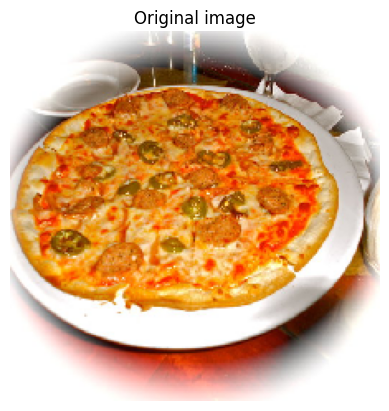

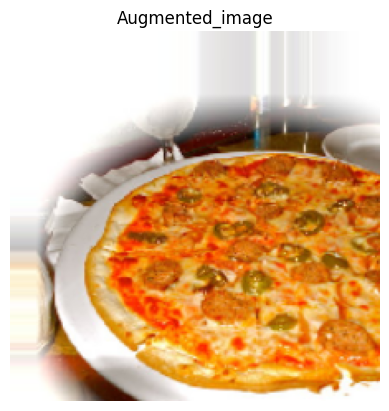

In [ ]:

# Show original image and augmented image
import random
rand_number=random.randint(0,30)
print(f"showing image with random number {rand_number}")
plt.imshow(images[rand_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[rand_number])
plt.title(f"Augmented_image")
plt.axis(False)

# let's build a model and see how it learns on augmented data

In [ ]:
model_6=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

val_steps=min(len(valid_data),
10)
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=valid_data,
                      validation_steps=val_steps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4631 - loss: 0.7124 - val_accuracy: 0.5531 - val_loss: 0.6908
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4889 - val_loss: 0.6925
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5415 - loss: 0.6925 - val_accuracy: 0.5750 - val_loss: 0.6855
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6843
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.6078 - loss: 0.7107 - val_accuracy: 0.5250 - val_loss: 0.6857


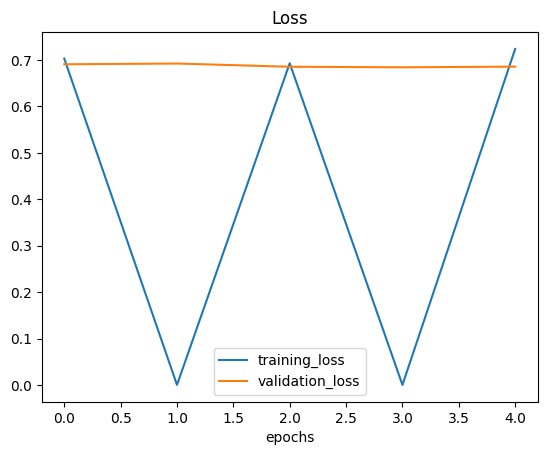

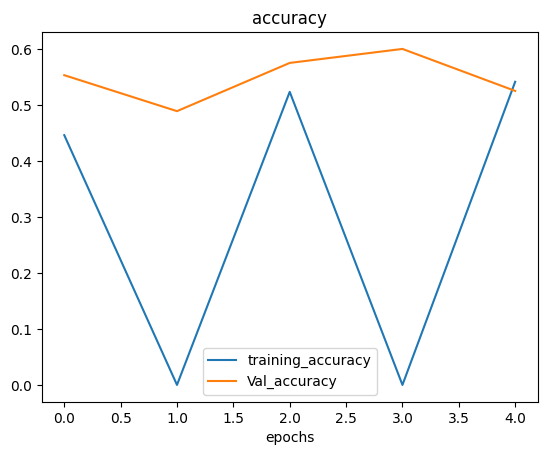

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_aug_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True)

Found 1500 images belonging to 2 classes.


Now we will try to build our model on the augmented as well as shuffled data let's see what happens


In [ ]:
model_7=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])
val_steps=min(10,len(valid_data))

history_7=model_7.fit(train_data_aug_shuffled,
                      epochs=10,
                      steps_per_epoch=len(train_data_aug_shuffled),
                      validation_data=valid_data,
                      validation_steps=val_steps)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5581 - loss: 0.6858 - val_accuracy: 0.6250 - val_loss: 0.6121
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6722 - val_loss: 0.6157
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6608 - loss: 0.6165 - val_accuracy: 0.7812 - val_loss: 0.4560
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7944 - val_loss: 0.4520
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7294 - loss: 0.5508 - val_accuracy: 0.7875 - val_loss: 0.4811
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7944 - val_loss: 0.4447
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7105 - loss: 0.5717 - val_accuracy: 0.7563 - val_loss: 0.5186
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+

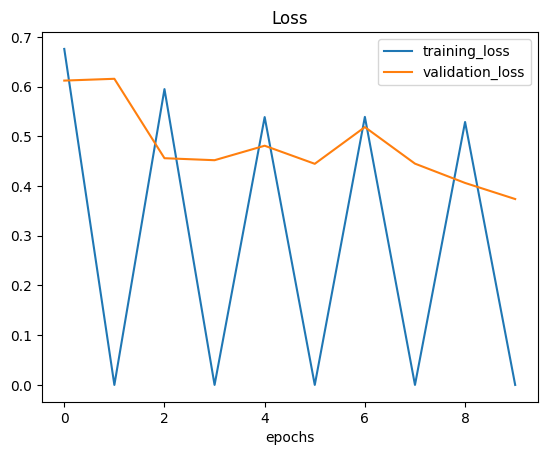

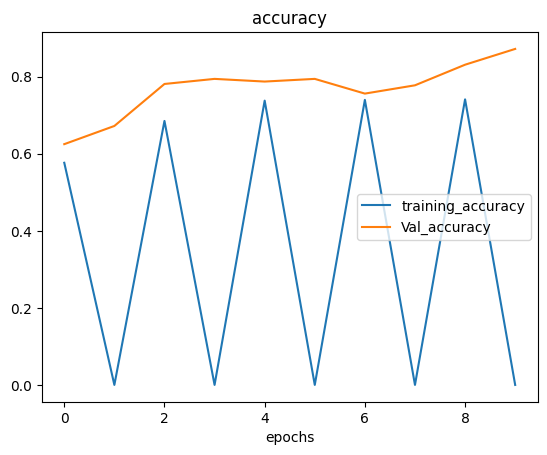

In [ ]:
plot_loss_curves(history_7)